In [68]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

## Import data

In [42]:
folder_path = 'data_loader/datasets/'
files_list = [
    f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) 
    and f.split('_')[0] == 'binance' 
    and f.split('_')[-1] == 'COMPBTC.csv.gz'
    and f.split('_')[1] == 'quotes']

In [43]:
def get_data(files_list):
    df = pd.DataFrame()
    # Use a loop to get all the csv.gz files from the path location in a single Dataframe
    for csv_file in tqdm(files_list):
        file_name = (folder_path + csv_file)
        if file_name[-2:] == "gz":
            df1 = pd.read_csv(file_name, compression='gzip')
            # Concatenate all the dataframes into a single dataframe
            df = pd.concat([df, df1], ignore_index=True)

    df['time'] = pd.to_datetime(df.timestamp, unit='us')
    df.set_index('time', inplace=True)
    df.sort_index(inplace=True)
    return df

In [44]:
df = get_data(files_list)

100%|██████████| 1/1 [00:00<00:00, 21.36it/s]


## Log-normal latency

Here we take the approach of estimating the latency based on a log-normal distribution. We calculate the random values with a mean of 0 and a standard deviation of $\sigma_{random} = \frac{\sigma_{latency}}{\mu_{latency}}$. This value is then used as a multiplier with the median latency we experienced in the past.

In [127]:
mu = 0
sigma = df.latency.std()/df.latency.median()

df['latency'] = df.local_timestamp - df.timestamp
df['rndn_latency'] = np.random.lognormal(mu, sigma, len(df)) * df.latency

<Axes: >

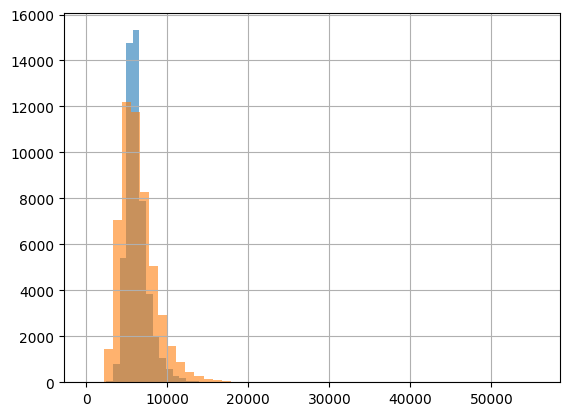

In [128]:
df.latency.hist(bins=50, alpha=.6)
df.rndn_latency.hist(bins=50, alpha=.6)